In [17]:
# import libraries
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
# load image
def li(p):
    img = cv2.imread(p)
    img = img.astype(np.float32)/127.5 -1
    img = np.expand_dims(img,0)
    img = tf.convert_to_tensor(img)
    return img

# preprocess image
def pi(img,td=224):
    shp = tf.cast(tf.shape(img)[1:-1], tf.float32)
    sd  = min(shp)
    scl = td/sd
    nhp = tf.cast(shp*scl, tf.int32)
    img = tf.image.resize(img,nhp)
    img = tf.image.resize_with_crop_or_pad(img, td,td)
    return img

In [19]:
def cartoon(img_p):
    # loading image
    si = li(img_p)

    psi = pi(si,td=512)
    psi.shape

    # model dataflow 
    m = '/kaggle/input/cartoongan/tflite/dr/1/1.tflite'
    i = tf.lite.Interpreter(model_path=m)
    ind = i.get_input_details()
    i.allocate_tensors()
    i.set_tensor(ind[0]['index'],psi)
    i.invoke()

    r = i.tensor(i.get_output_details()[0]['index'])()

    # post process the model output
    o = (np.squeeze(r)+1.0)*127.5
    o = np.clip(o,0,255).astype(np.uint8)
    o = cv2.cvtColor(o,cv2.COLOR_BGR2RGB)

    print('input:')
    plt.imshow(plt.imread(img_p))
    plt.show();
    print('output:')
    plt.imshow(o)
    plt.show();


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


input:


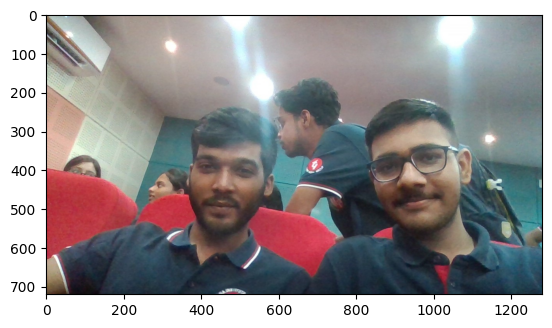

output:


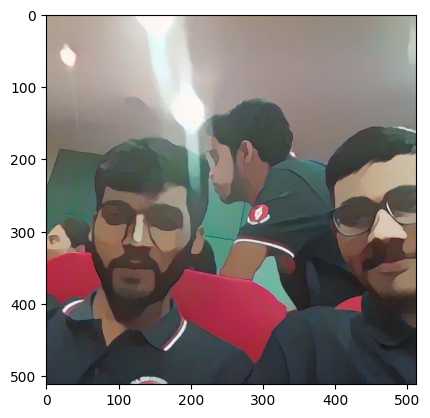

In [22]:
# checking the results
imgs = ['/kaggle/input/whatsapp-image/WIN_20230921_14_32_27_Pro.jpg']

for i in imgs:
    cartoon(i)